# Intercorrélation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['axes.grid'] = True
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.size'] = 16

## Communications numériques

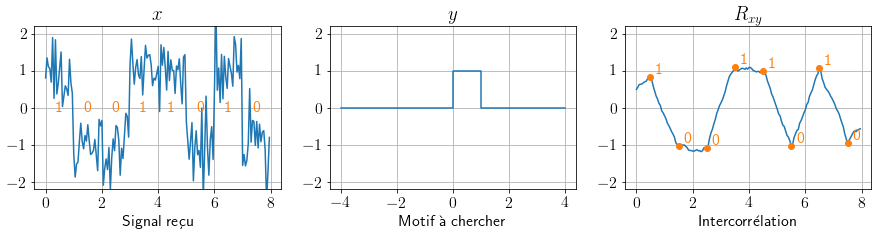

In [2]:
# Initialisation de l'affichage
ylim = [-2.2, 2.2]
fig, axs = plt.subplots(1, 3, figsize=(15,3))

# Message
msg = np.array([1, 0, 0, 1, 1, 0, 1, 0])
M = len(msg)

# Temps & instants d'échantillonnage
Fe = 20
n = np.arange(0, M, 1/Fe)
idx = np.arange(M)*Fe + Fe//2

# Forme d'onde
h = np.ones(Fe)

# Signal émis
x = np.kron(2*msg-1, h)

# Signal reçu (bruité)
b = np.random.normal(0, .5, x.shape)
y = x + b
axs[0].plot(n,y)
for i in range(M):
    axs[0].text(n[idx[i]], 0, msg[i], ha="center", va="center", color="C1")
axs[0].set_title('$x$')
axs[0].set_xlabel('Signal reçu')
axs[0].set_ylim(ylim)

# Forme d'onde (graphique)
axs[1].plot([-4, 0, 0, 1, 1, 4], [0, 0, 1, 1, 0, 0])
axs[1].set_title('$y$')
axs[1].set_xlabel('Motif à chercher')
axs[1].set_ylim(ylim)

# Intercorrélation
z = np.correlate(y, h/Fe, mode="same")
axs[2].plot(n, z)
for i in range(M):
    axs[2].plot(n[idx[i]], z[idx[i]], "C1o")
    axs[2].text(n[idx[i]]+.2, z[idx[i]], msg[i], ha="left", va="bottom", color="C1")
axs[2].set_title("$R_{xy}$")
axs[2].set_xlabel('Intercorrélation')
axs[2].set_ylim(ylim)

plt.savefig("communications.svg", bbox_inches="tight")

## Intercorrélation avec une sinusoïde

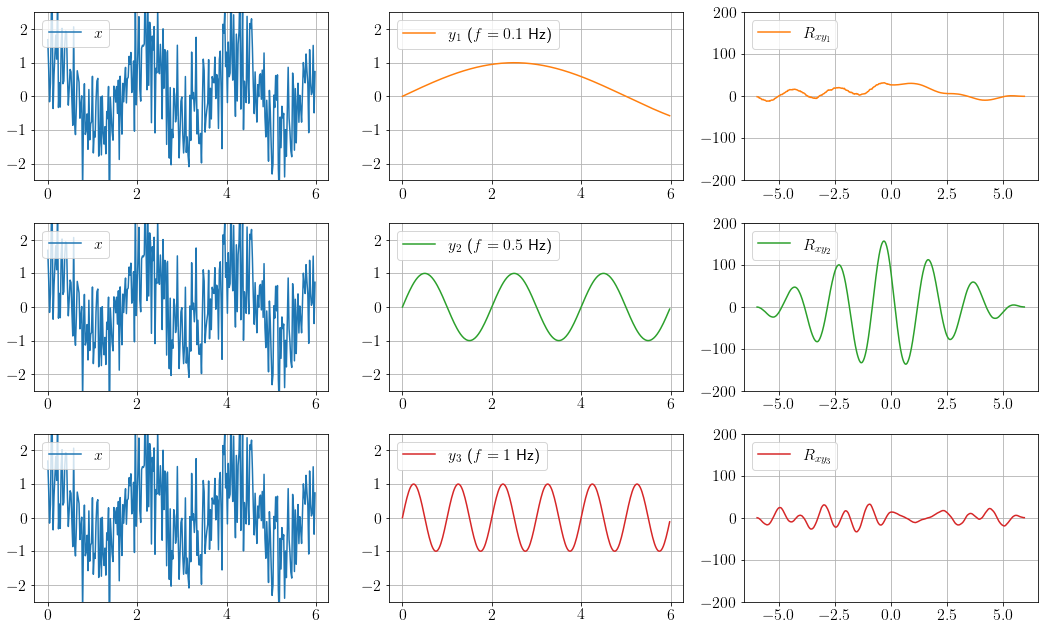

In [3]:
# Fréquences
freqs = [.1, .5, 1]

# Temps
N = 300
Te = 1/50
t = np.arange(0,N) * Te
u = np.arange(-N,N-1) * Te

# Signal bruité
x = np.sin(2*np.pi*freqs[1]*t + 1)
b = np.random.normal(0, 1, x.shape)
y = x + b

# Initialisation de l'affichage
ylim = [-2.5, 2.5]
fig, axs = plt.subplots(3, 3, figsize=(15,9))
fig.tight_layout(pad=1.0)

for i in range(3):
    
    f = freqs[i]
    
    # Signal x
    axs[i][0].plot(t, y, label='$x$', color='C0')
    
    # Signal y
    w = np.sin(2*np.pi*f*t)
    axs[i][1].plot(t, w, label=f'$y_{i+1}$ ($f={f}$ Hz)', color=f'C{i+1}')
    
    # Intercorrélation
    z = np.correlate(y, w, mode="full")
    axs[i][2].plot(u,z, label=f'$R_{{xy_{i+1}}}$', color=f'C{i+1}')
    axs[i][2].set_ylim([-200, 200])
    
    for j in range(2):
        axs[i][j].set_ylim(ylim)
    for j in range(3):
        axs[i][j].legend(loc='upper left')

plt.savefig("sinusoide.svg", bbox_inches='tight')